<a href="https://colab.research.google.com/github/Kritika0027/Data-Analytics/blob/main/Weather_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam


In [2]:
url = "https://raw.githubusercontent.com/velicki/Weather_Data_Analysis_Project/main/Weather_Data.csv"
data = pd.read_csv(url)


In [3]:
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [6]:
print(data.columns)


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')


In [9]:
temperature_data = data['Temp_C'].values.reshape(-1, 1)


Normalizing the data

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature_data)

In [11]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [12]:
# Set the sequence length (e.g., 30 time steps)
sequence_length = 30
X, y = create_sequences(temperature_scaled, sequence_length)

In [13]:
# Reshape X to fit the RNN input shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [14]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [16]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)

Epoch 1/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0129 - val_loss: 4.6013e-04
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 5.9210e-04 - val_loss: 4.0050e-04
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.2865e-04 - val_loss: 3.3687e-04
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 4.6720e-04 - val_loss: 2.8867e-04
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.7631e-04 - val_loss: 2.7000e-04
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.2770e-04 - val_loss: 2.6981e-04
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3.3087e-04 - val_loss: 3.2074e-04
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 3.6207e-04 - val_loss: 2.2556e-04
Epoch 9/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.8576e-04 - val_loss: 2.2662e-04
Epoch 10/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.9850e-04 - val_loss: 2.1736e-04
Epoch 11/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2

In [18]:
# Predict the last sequence in the dataset
last_sequence = temperature_scaled[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, 1))

In [19]:
predicted_value = model.predict(last_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [20]:
predicted_temperature = scaler.inverse_transform(predicted_value)
print("Predicted Temperature:", predicted_temperature[0][0])

Predicted Temperature: -0.15124613


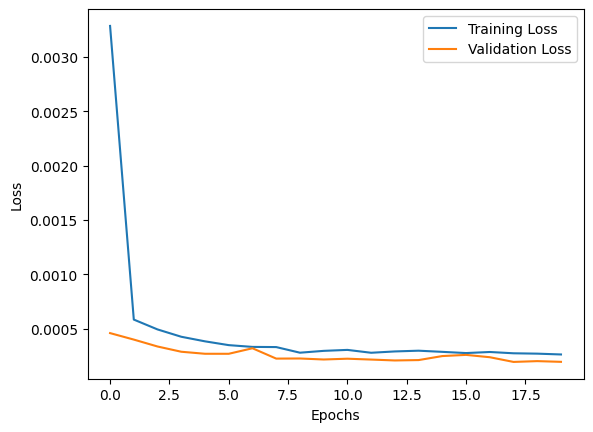

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()